## Setting Up

In [25]:
%autosave 1

Autosaving every 1 seconds


In [1]:
#imports
import sys
import shutil
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
import os

In [2]:
#instantialization

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
#defining functions

def mediapipe_detection(img,model):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = model.process(img) #model predicts on input frame
    img.flags.writeable = True
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    
    hand_detected: bool = results.left_hand_landmarks or results.right_hand_landmarks
    return img,results,hand_detected

def draw_landmarks(img,results):
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1))    
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1))    
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1))    

# Data Extraction

Paths

In [4]:
DATA_PATH = os.path.join('MP_DATA')
SAMPLE_PATH = 'SAMPLE_DATA'

Analysis

In [30]:
last_frame = {'detected_at':None , 'frame':None }
def analyse():
    cap = cv2.VideoCapture(0)
    #Testing vedio capture
    with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
        try:
            if cap.isOpened():
                while cap.isOpened():
                    ret, frame = cap.read() #read
                    if not ret:
                        break
                    frame = cv2.flip(frame, 1)
                    image, results, hand_detected = mediapipe_detection(frame,holistic) #apply model
                    draw_landmarks(image, results) #draw results
                    if hand_detected:
                        last_frame['frame'] = image.copy()
                        last_frame['detected_at'] = cap.get(cv2.CAP_PROP_POS_FRAMES)# current frame number
                        font = cv2.FONT_HERSHEY_SIMPLEX
                        cv2.putText(image, 'Hand Detected', (0, 20), font, 1, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)#show
                    if cv2.waitKey(10) & 0xFF == ord('q'):#quit
                        raise Exception('Keyboard interrupt')
            else:
                print('Cannot open video')
        finally:
            cap.release()
            cv2.destroyAllWindows()


In [29]:
analyse()

Exception: Keyboard interrupt

total frames = 74


50.0

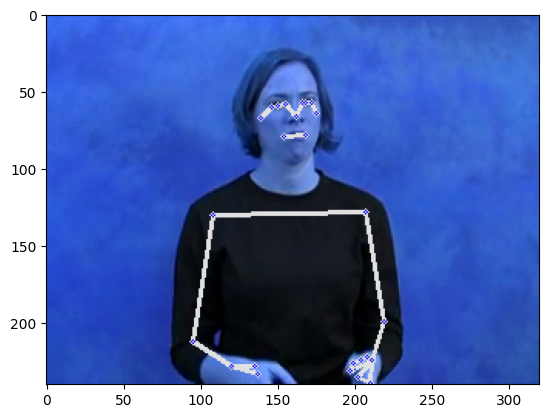

In [170]:
plt.imshow(last_frame['frame'])
last_frame['detected_at']

new Sampling

In [5]:
signs = ['hello','how','you','people']
sequence_length = 30
video_length = 30

In [6]:
def create_video_writer(cap, destination):
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(destination, fourcc, fps, (width, height))
    return out

In [9]:
def construct_video(sign):
    cap = cv2.VideoCapture(0)
    try: 
        for sequence in range(sequence_length):
            output_video_path = os.path.join(SAMPLE_PATH,sign,str(sequence)+'.mp4')
            out = create_video_writer(cap,output_video_path)

            for frame_number in range(video_length):
                ret, frame = cap.read() #read 
                frame = cv2.flip(frame,1)
                if not ret:
                    break

                if frame_number == 0:
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    cv2.putText(frame, 'Starting Collection', (0, 20), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.putText(frame, f'Sequence {sequence} for sign\'{sign}\'', (0, 40), font, 0.55, (0, 200, 0), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(frame, f'Sequence {sequence} for sign\'{sign}\'', (0, 40), font, 0.55, (0, 200, 0), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', frame)
                out.write(frame)   
                print(f'saved {output_video_path}')
                if cv2.waitKey(10) & 0xFF == ord('q'):#quit
                    raise Exception('Keyboard interrupt')       
    finally:
        cv2.destroyAllWindows()
        cap.release()
        out.release()

In [10]:
construct_video('how')

saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\0.mp4
saved SAMPLE_DATA\how\1.mp4
saved SAMPLE_DATA\how\1.mp4
saved SAMPLE_DATA\how\1.mp4
saved SAMPLE_DATA\how\1.mp4
saved SAMPLE_DATA\how\1.mp4
saved SAMPLE_DATA\ho

saved SAMPLE_DATA\how\9.mp4
saved SAMPLE_DATA\how\9.mp4
saved SAMPLE_DATA\how\9.mp4
saved SAMPLE_DATA\how\9.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\how\10.mp4
saved SAMPLE_DATA\

saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\19.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_DATA\how\20.mp4
saved SAMPLE_D

saved SAMPLE_DATA\how\28.mp4
saved SAMPLE_DATA\how\28.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4
saved SAMPLE_DATA\how\29.mp4


Data Augmentation

In [46]:
def random_flip(frame,to_flip):
    if to_flip:
        return cv2.flip(frame, 1)  
    return frame

In [47]:
def random_zoom(frame,zoom_factor):
    h, w = frame.shape[:2]
    zoom_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), 1, zoom_factor)
    zoomed_frame = cv2.warpAffine(frame, zoom_matrix, (w, h))
    return zoomed_frame

In [48]:
def random_brightness_contrast(frame,alpha,beta):
    augmented_frame = cv2.convertScaleAbs(frame, alpha=alpha, beta=beta)
    return augmented_frame

In [49]:
def random_rotation(frame,angle):
    h, w = frame.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_frame = cv2.warpAffine(frame, rotation_matrix, (w, h))
    return rotated_frame

In [50]:
def perform_augmentation(frame,to_flip,rotation_angle,brightness_alpha,contrast_beta,zoom_factor):
    frame = random_flip(frame,to_flip)
    frame = random_zoom(frame,zoom_factor)
    frame = random_brightness_contrast(frame,brightness_alpha,contrast_beta)
    frame = random_rotation(frame,rotation_angle)
    return frame

In [51]:
def get_augmentation_parameters():
    to_flip = True if np.random.rand() > 0.5 else False
    rotation_angle = np.random.uniform(-15, 15)
    brightness_alpha = np.random.uniform(0.8, 1.2)
    contrast_beta = np.random.uniform(0.8, 1.2)
    zoom_factor = np.random.uniform(0.8, 1.2)
    return to_flip,rotation_angle,brightness_alpha,contrast_beta,zoom_factor

In [53]:
def apply_augmentation():
    for sign in sample_signs:
        videos = os.listdir(os.path.join(SAMPLE_PATH,sign))
        counter = len(videos)
        print(f'in {sign} :')
        for video in videos:
            input_video_path = os.path.join(SAMPLE_PATH,sign,video)
            cap = cv2.VideoCapture(input_video_path)
            output_video_path = os.path.join(SAMPLE_PATH,sign,str(counter+1)+'.mp4')
            out = create_video_writer(cap,output_video_path)
            try:
                if cap.isOpened():
                    to_flip,rotation_angle,brightness_alpha,contrast_beta,zoom_factor = get_augmentation_parameters() #runs once per video
                    while cap.isOpened():
                        ret, frame = cap.read() #read 
                        if not ret:
                            break
                        frame = perform_augmentation(frame,to_flip, rotation_angle,brightness_alpha,contrast_beta,zoom_factor)
                        out.write(frame)   
                    print(f'saved {output_video_path}')
                    counter += 1
                else:
                    print(f'cannot open {input_video_path}')
            except Exception as e:
                print(e)
                print(f'failed to augment {input_video_path}')
                sys.exit()
            finally:
                cap.release()
                out.release()
    print('Augmentation Complete')
            

In [59]:
apply_augmentation()

in hello :
saved SAMPLE_DATA\hello\17.mp4
saved SAMPLE_DATA\hello\18.mp4
saved SAMPLE_DATA\hello\19.mp4
saved SAMPLE_DATA\hello\20.mp4
saved SAMPLE_DATA\hello\21.mp4
saved SAMPLE_DATA\hello\22.mp4
saved SAMPLE_DATA\hello\23.mp4
saved SAMPLE_DATA\hello\24.mp4
saved SAMPLE_DATA\hello\25.mp4
saved SAMPLE_DATA\hello\26.mp4
saved SAMPLE_DATA\hello\27.mp4
saved SAMPLE_DATA\hello\28.mp4
saved SAMPLE_DATA\hello\29.mp4
saved SAMPLE_DATA\hello\30.mp4
saved SAMPLE_DATA\hello\31.mp4
saved SAMPLE_DATA\hello\32.mp4
in how :
saved SAMPLE_DATA\how\37.mp4
saved SAMPLE_DATA\how\38.mp4
saved SAMPLE_DATA\how\39.mp4
saved SAMPLE_DATA\how\40.mp4
saved SAMPLE_DATA\how\41.mp4
saved SAMPLE_DATA\how\42.mp4
saved SAMPLE_DATA\how\43.mp4
saved SAMPLE_DATA\how\44.mp4
saved SAMPLE_DATA\how\45.mp4
saved SAMPLE_DATA\how\46.mp4
saved SAMPLE_DATA\how\47.mp4
saved SAMPLE_DATA\how\48.mp4
saved SAMPLE_DATA\how\49.mp4
saved SAMPLE_DATA\how\50.mp4
saved SAMPLE_DATA\how\51.mp4
saved SAMPLE_DATA\how\52.mp4
saved SAMPLE_DATA\ho

In [ ]:
## ^RAN THRICE

Creating MP_Data

In [76]:
def extract_data(results):
    pose_data = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    left_hand_data = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand_data = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose_data,left_hand_data,right_hand_data])

In [26]:
33*4+21*3+21*3

258

In [77]:
exit = False

last_frame = None

for sign in sample_signs:

    sign_path = os.path.join(SAMPLE_PATH,sign)
    #list of videos in that sign
    videos = os.listdir(sign_path) 
    counter_1 = 0
    for video in videos:
        if exit:
            raise Exception("User Exit")
        VIDEO_PATH = os.path.join(sign_path,video)

        #checking if viedo exists in VIDEO_DATA
        if os.path.exists(VIDEO_PATH):
            #make dir of same name in MP_DATA
            dir_path = os.path.join(DATA_PATH,sign,str(counter_1))
            os.makedirs(dir_path,exist_ok=True)
            cap = cv2.VideoCapture(VIDEO_PATH)

            with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
                try:
                    #checking if the video can be opened
                    if cap.isOpened():
                        for frame_no in range(sequence_length):
                            npy_path = os.path.join(dir_path,str(frame_no))
                            ret, frame = cap.read() 
                            #if the sequence length exceeds the video length
                            if not ret:
                                frame = last_frame
                            image, results, hand_detected = mediapipe_detection(frame,holistic) #apply model 
                            draw_landmarks(image, results) #draw results

                            #saving the data :
                            keypoints_data = extract_data(results)
                            np.save(npy_path,keypoints_data)
                            print(f'saved {npy_path}')
                            last_frame = frame 
                            if cv2.waitKey(10) & 0xFF == ord('q'):#quit
                                print(f'!Quitting at {VIDEO_PATH}')
                                exit = True
                                break
                        counter_1 += 1
                    else:
                        print(f'!Cannot open video {VIDEO_PATH}')
                finally:
                    cap.release()
                    cv2.destroyAllWindows()


        else:
            print(f'!Path {VIDEO_PATH} does not exist')


saved MP_DATA\hello\0\0
saved MP_DATA\hello\0\1
saved MP_DATA\hello\0\2
saved MP_DATA\hello\0\3
saved MP_DATA\hello\0\4
saved MP_DATA\hello\0\5
saved MP_DATA\hello\0\6
saved MP_DATA\hello\0\7
saved MP_DATA\hello\0\8
saved MP_DATA\hello\0\9
saved MP_DATA\hello\0\10
saved MP_DATA\hello\0\11
saved MP_DATA\hello\0\12
saved MP_DATA\hello\0\13
saved MP_DATA\hello\0\14
saved MP_DATA\hello\0\15
saved MP_DATA\hello\0\16
saved MP_DATA\hello\0\17
saved MP_DATA\hello\0\18
saved MP_DATA\hello\0\19
saved MP_DATA\hello\0\20
saved MP_DATA\hello\0\21
saved MP_DATA\hello\0\22
saved MP_DATA\hello\0\23
saved MP_DATA\hello\0\24
saved MP_DATA\hello\0\25
saved MP_DATA\hello\0\26
saved MP_DATA\hello\0\27
saved MP_DATA\hello\0\28
saved MP_DATA\hello\0\29
saved MP_DATA\hello\0\30
saved MP_DATA\hello\0\31
saved MP_DATA\hello\0\32
saved MP_DATA\hello\0\33
saved MP_DATA\hello\0\34
saved MP_DATA\hello\0\35
saved MP_DATA\hello\0\36
saved MP_DATA\hello\0\37
saved MP_DATA\hello\0\38
saved MP_DATA\hello\0\39
saved MP_D

saved MP_DATA\hello\3\61
saved MP_DATA\hello\3\62
saved MP_DATA\hello\3\63
saved MP_DATA\hello\3\64
saved MP_DATA\hello\3\65
saved MP_DATA\hello\3\66
saved MP_DATA\hello\3\67
saved MP_DATA\hello\3\68
saved MP_DATA\hello\3\69
saved MP_DATA\hello\3\70
saved MP_DATA\hello\3\71
saved MP_DATA\hello\3\72
saved MP_DATA\hello\3\73
saved MP_DATA\hello\3\74
saved MP_DATA\hello\3\75
saved MP_DATA\hello\3\76
saved MP_DATA\hello\3\77
saved MP_DATA\hello\3\78
saved MP_DATA\hello\3\79
saved MP_DATA\hello\3\80
saved MP_DATA\hello\3\81
saved MP_DATA\hello\3\82
saved MP_DATA\hello\3\83
saved MP_DATA\hello\3\84
saved MP_DATA\hello\3\85
saved MP_DATA\hello\3\86
saved MP_DATA\hello\3\87
saved MP_DATA\hello\3\88
saved MP_DATA\hello\3\89
saved MP_DATA\hello\4\0
saved MP_DATA\hello\4\1
saved MP_DATA\hello\4\2
saved MP_DATA\hello\4\3
saved MP_DATA\hello\4\4
saved MP_DATA\hello\4\5
saved MP_DATA\hello\4\6
saved MP_DATA\hello\4\7
saved MP_DATA\hello\4\8
saved MP_DATA\hello\4\9
saved MP_DATA\hello\4\10
saved MP_D

saved MP_DATA\hello\7\33
saved MP_DATA\hello\7\34
saved MP_DATA\hello\7\35
saved MP_DATA\hello\7\36
saved MP_DATA\hello\7\37
saved MP_DATA\hello\7\38
saved MP_DATA\hello\7\39
saved MP_DATA\hello\7\40
saved MP_DATA\hello\7\41
saved MP_DATA\hello\7\42
saved MP_DATA\hello\7\43
saved MP_DATA\hello\7\44
saved MP_DATA\hello\7\45
saved MP_DATA\hello\7\46
saved MP_DATA\hello\7\47
saved MP_DATA\hello\7\48
saved MP_DATA\hello\7\49
saved MP_DATA\hello\7\50
saved MP_DATA\hello\7\51
saved MP_DATA\hello\7\52
saved MP_DATA\hello\7\53
saved MP_DATA\hello\7\54
saved MP_DATA\hello\7\55
saved MP_DATA\hello\7\56
saved MP_DATA\hello\7\57
saved MP_DATA\hello\7\58
saved MP_DATA\hello\7\59
saved MP_DATA\hello\7\60
saved MP_DATA\hello\7\61
saved MP_DATA\hello\7\62
saved MP_DATA\hello\7\63
saved MP_DATA\hello\7\64
saved MP_DATA\hello\7\65
saved MP_DATA\hello\7\66
saved MP_DATA\hello\7\67
saved MP_DATA\hello\7\68
saved MP_DATA\hello\7\69
saved MP_DATA\hello\7\70
saved MP_DATA\hello\7\71
saved MP_DATA\hello\7\72


saved MP_DATA\hello\11\0
saved MP_DATA\hello\11\1
saved MP_DATA\hello\11\2
saved MP_DATA\hello\11\3
saved MP_DATA\hello\11\4
saved MP_DATA\hello\11\5
saved MP_DATA\hello\11\6
saved MP_DATA\hello\11\7
saved MP_DATA\hello\11\8
saved MP_DATA\hello\11\9
saved MP_DATA\hello\11\10
saved MP_DATA\hello\11\11
saved MP_DATA\hello\11\12
saved MP_DATA\hello\11\13
saved MP_DATA\hello\11\14
saved MP_DATA\hello\11\15
saved MP_DATA\hello\11\16
saved MP_DATA\hello\11\17
saved MP_DATA\hello\11\18
saved MP_DATA\hello\11\19
saved MP_DATA\hello\11\20
saved MP_DATA\hello\11\21
saved MP_DATA\hello\11\22
saved MP_DATA\hello\11\23
saved MP_DATA\hello\11\24
saved MP_DATA\hello\11\25
saved MP_DATA\hello\11\26
saved MP_DATA\hello\11\27
saved MP_DATA\hello\11\28
saved MP_DATA\hello\11\29
saved MP_DATA\hello\11\30
saved MP_DATA\hello\11\31
saved MP_DATA\hello\11\32
saved MP_DATA\hello\11\33
saved MP_DATA\hello\11\34
saved MP_DATA\hello\11\35
saved MP_DATA\hello\11\36
saved MP_DATA\hello\11\37
saved MP_DATA\hello\11

saved MP_DATA\hello\14\47
saved MP_DATA\hello\14\48
saved MP_DATA\hello\14\49
saved MP_DATA\hello\14\50
saved MP_DATA\hello\14\51
saved MP_DATA\hello\14\52
saved MP_DATA\hello\14\53
saved MP_DATA\hello\14\54
saved MP_DATA\hello\14\55
saved MP_DATA\hello\14\56
saved MP_DATA\hello\14\57
saved MP_DATA\hello\14\58
saved MP_DATA\hello\14\59
saved MP_DATA\hello\14\60
saved MP_DATA\hello\14\61
saved MP_DATA\hello\14\62
saved MP_DATA\hello\14\63
saved MP_DATA\hello\14\64
saved MP_DATA\hello\14\65
saved MP_DATA\hello\14\66
saved MP_DATA\hello\14\67
saved MP_DATA\hello\14\68
saved MP_DATA\hello\14\69
saved MP_DATA\hello\14\70
saved MP_DATA\hello\14\71
saved MP_DATA\hello\14\72
saved MP_DATA\hello\14\73
saved MP_DATA\hello\14\74
saved MP_DATA\hello\14\75
saved MP_DATA\hello\14\76
saved MP_DATA\hello\14\77
saved MP_DATA\hello\14\78
saved MP_DATA\hello\14\79
saved MP_DATA\hello\14\80
saved MP_DATA\hello\14\81
saved MP_DATA\hello\14\82
saved MP_DATA\hello\14\83
saved MP_DATA\hello\14\84
saved MP_DAT

saved MP_DATA\hello\18\6
saved MP_DATA\hello\18\7
saved MP_DATA\hello\18\8
saved MP_DATA\hello\18\9
saved MP_DATA\hello\18\10
saved MP_DATA\hello\18\11
saved MP_DATA\hello\18\12
saved MP_DATA\hello\18\13
saved MP_DATA\hello\18\14
saved MP_DATA\hello\18\15
saved MP_DATA\hello\18\16
saved MP_DATA\hello\18\17
saved MP_DATA\hello\18\18
saved MP_DATA\hello\18\19
saved MP_DATA\hello\18\20
saved MP_DATA\hello\18\21
saved MP_DATA\hello\18\22
saved MP_DATA\hello\18\23
saved MP_DATA\hello\18\24
saved MP_DATA\hello\18\25
saved MP_DATA\hello\18\26
saved MP_DATA\hello\18\27
saved MP_DATA\hello\18\28
saved MP_DATA\hello\18\29
saved MP_DATA\hello\18\30
saved MP_DATA\hello\18\31
saved MP_DATA\hello\18\32
saved MP_DATA\hello\18\33
saved MP_DATA\hello\18\34
saved MP_DATA\hello\18\35
saved MP_DATA\hello\18\36
saved MP_DATA\hello\18\37
saved MP_DATA\hello\18\38
saved MP_DATA\hello\18\39
saved MP_DATA\hello\18\40
saved MP_DATA\hello\18\41
saved MP_DATA\hello\18\42
saved MP_DATA\hello\18\43
saved MP_DATA\he

saved MP_DATA\hello\21\53
saved MP_DATA\hello\21\54
saved MP_DATA\hello\21\55
saved MP_DATA\hello\21\56
saved MP_DATA\hello\21\57
saved MP_DATA\hello\21\58
saved MP_DATA\hello\21\59
saved MP_DATA\hello\21\60
saved MP_DATA\hello\21\61
saved MP_DATA\hello\21\62
saved MP_DATA\hello\21\63
saved MP_DATA\hello\21\64
saved MP_DATA\hello\21\65
saved MP_DATA\hello\21\66
saved MP_DATA\hello\21\67
saved MP_DATA\hello\21\68
saved MP_DATA\hello\21\69
saved MP_DATA\hello\21\70
saved MP_DATA\hello\21\71
saved MP_DATA\hello\21\72
saved MP_DATA\hello\21\73
saved MP_DATA\hello\21\74
saved MP_DATA\hello\21\75
saved MP_DATA\hello\21\76
saved MP_DATA\hello\21\77
saved MP_DATA\hello\21\78
saved MP_DATA\hello\21\79
saved MP_DATA\hello\21\80
saved MP_DATA\hello\21\81
saved MP_DATA\hello\21\82
saved MP_DATA\hello\21\83
saved MP_DATA\hello\21\84
saved MP_DATA\hello\21\85
saved MP_DATA\hello\21\86
saved MP_DATA\hello\21\87
saved MP_DATA\hello\21\88
saved MP_DATA\hello\21\89
saved MP_DATA\hello\22\0
saved MP_DATA

saved MP_DATA\hello\25\12
saved MP_DATA\hello\25\13
saved MP_DATA\hello\25\14
saved MP_DATA\hello\25\15
saved MP_DATA\hello\25\16
saved MP_DATA\hello\25\17
saved MP_DATA\hello\25\18
saved MP_DATA\hello\25\19
saved MP_DATA\hello\25\20
saved MP_DATA\hello\25\21
saved MP_DATA\hello\25\22
saved MP_DATA\hello\25\23
saved MP_DATA\hello\25\24
saved MP_DATA\hello\25\25
saved MP_DATA\hello\25\26
saved MP_DATA\hello\25\27
saved MP_DATA\hello\25\28
saved MP_DATA\hello\25\29
saved MP_DATA\hello\25\30
saved MP_DATA\hello\25\31
saved MP_DATA\hello\25\32
saved MP_DATA\hello\25\33
saved MP_DATA\hello\25\34
saved MP_DATA\hello\25\35
saved MP_DATA\hello\25\36
saved MP_DATA\hello\25\37
saved MP_DATA\hello\25\38
saved MP_DATA\hello\25\39
saved MP_DATA\hello\25\40
saved MP_DATA\hello\25\41
saved MP_DATA\hello\25\42
saved MP_DATA\hello\25\43
saved MP_DATA\hello\25\44
saved MP_DATA\hello\25\45
saved MP_DATA\hello\25\46
saved MP_DATA\hello\25\47
saved MP_DATA\hello\25\48
saved MP_DATA\hello\25\49
saved MP_DAT

saved MP_DATA\hello\28\59
saved MP_DATA\hello\28\60
saved MP_DATA\hello\28\61
saved MP_DATA\hello\28\62
saved MP_DATA\hello\28\63
saved MP_DATA\hello\28\64
saved MP_DATA\hello\28\65
saved MP_DATA\hello\28\66
saved MP_DATA\hello\28\67
saved MP_DATA\hello\28\68
saved MP_DATA\hello\28\69
saved MP_DATA\hello\28\70
saved MP_DATA\hello\28\71
saved MP_DATA\hello\28\72
saved MP_DATA\hello\28\73
saved MP_DATA\hello\28\74
saved MP_DATA\hello\28\75
saved MP_DATA\hello\28\76
saved MP_DATA\hello\28\77
saved MP_DATA\hello\28\78
saved MP_DATA\hello\28\79
saved MP_DATA\hello\28\80
saved MP_DATA\hello\28\81
saved MP_DATA\hello\28\82
saved MP_DATA\hello\28\83
saved MP_DATA\hello\28\84
saved MP_DATA\hello\28\85
saved MP_DATA\hello\28\86
saved MP_DATA\hello\28\87
saved MP_DATA\hello\28\88
saved MP_DATA\hello\28\89
saved MP_DATA\hello\29\0
saved MP_DATA\hello\29\1
saved MP_DATA\hello\29\2
saved MP_DATA\hello\29\3
saved MP_DATA\hello\29\4
saved MP_DATA\hello\29\5
saved MP_DATA\hello\29\6
saved MP_DATA\hello

saved MP_DATA\how\2\44
saved MP_DATA\how\2\45
saved MP_DATA\how\2\46
saved MP_DATA\how\2\47
saved MP_DATA\how\2\48
saved MP_DATA\how\2\49
saved MP_DATA\how\2\50
saved MP_DATA\how\2\51
saved MP_DATA\how\2\52
saved MP_DATA\how\2\53
saved MP_DATA\how\2\54
saved MP_DATA\how\2\55
saved MP_DATA\how\2\56
saved MP_DATA\how\2\57
saved MP_DATA\how\2\58
saved MP_DATA\how\2\59
saved MP_DATA\how\2\60
saved MP_DATA\how\2\61
saved MP_DATA\how\2\62
saved MP_DATA\how\2\63
saved MP_DATA\how\2\64
saved MP_DATA\how\2\65
saved MP_DATA\how\2\66
saved MP_DATA\how\2\67
saved MP_DATA\how\2\68
saved MP_DATA\how\2\69
saved MP_DATA\how\2\70
saved MP_DATA\how\2\71
saved MP_DATA\how\2\72
saved MP_DATA\how\2\73
saved MP_DATA\how\2\74
saved MP_DATA\how\2\75
saved MP_DATA\how\2\76
saved MP_DATA\how\2\77
saved MP_DATA\how\2\78
saved MP_DATA\how\2\79
saved MP_DATA\how\2\80
saved MP_DATA\how\2\81
saved MP_DATA\how\2\82
saved MP_DATA\how\2\83
saved MP_DATA\how\2\84
saved MP_DATA\how\2\85
saved MP_DATA\how\2\86
saved MP_DA

saved MP_DATA\how\6\44
saved MP_DATA\how\6\45
saved MP_DATA\how\6\46
saved MP_DATA\how\6\47
saved MP_DATA\how\6\48
saved MP_DATA\how\6\49
saved MP_DATA\how\6\50
saved MP_DATA\how\6\51
saved MP_DATA\how\6\52
saved MP_DATA\how\6\53
saved MP_DATA\how\6\54
saved MP_DATA\how\6\55
saved MP_DATA\how\6\56
saved MP_DATA\how\6\57
saved MP_DATA\how\6\58
saved MP_DATA\how\6\59
saved MP_DATA\how\6\60
saved MP_DATA\how\6\61
saved MP_DATA\how\6\62
saved MP_DATA\how\6\63
saved MP_DATA\how\6\64
saved MP_DATA\how\6\65
saved MP_DATA\how\6\66
saved MP_DATA\how\6\67
saved MP_DATA\how\6\68
saved MP_DATA\how\6\69
saved MP_DATA\how\6\70
saved MP_DATA\how\6\71
saved MP_DATA\how\6\72
saved MP_DATA\how\6\73
saved MP_DATA\how\6\74
saved MP_DATA\how\6\75
saved MP_DATA\how\6\76
saved MP_DATA\how\6\77
saved MP_DATA\how\6\78
saved MP_DATA\how\6\79
saved MP_DATA\how\6\80
saved MP_DATA\how\6\81
saved MP_DATA\how\6\82
saved MP_DATA\how\6\83
saved MP_DATA\how\6\84
saved MP_DATA\how\6\85
saved MP_DATA\how\6\86
saved MP_DA

saved MP_DATA\how\10\41
saved MP_DATA\how\10\42
saved MP_DATA\how\10\43
saved MP_DATA\how\10\44
saved MP_DATA\how\10\45
saved MP_DATA\how\10\46
saved MP_DATA\how\10\47
saved MP_DATA\how\10\48
saved MP_DATA\how\10\49
saved MP_DATA\how\10\50
saved MP_DATA\how\10\51
saved MP_DATA\how\10\52
saved MP_DATA\how\10\53
saved MP_DATA\how\10\54
saved MP_DATA\how\10\55
saved MP_DATA\how\10\56
saved MP_DATA\how\10\57
saved MP_DATA\how\10\58
saved MP_DATA\how\10\59
saved MP_DATA\how\10\60
saved MP_DATA\how\10\61
saved MP_DATA\how\10\62
saved MP_DATA\how\10\63
saved MP_DATA\how\10\64
saved MP_DATA\how\10\65
saved MP_DATA\how\10\66
saved MP_DATA\how\10\67
saved MP_DATA\how\10\68
saved MP_DATA\how\10\69
saved MP_DATA\how\10\70
saved MP_DATA\how\10\71
saved MP_DATA\how\10\72
saved MP_DATA\how\10\73
saved MP_DATA\how\10\74
saved MP_DATA\how\10\75
saved MP_DATA\how\10\76
saved MP_DATA\how\10\77
saved MP_DATA\how\10\78
saved MP_DATA\how\10\79
saved MP_DATA\how\10\80
saved MP_DATA\how\10\81
saved MP_DATA\ho

saved MP_DATA\how\14\25
saved MP_DATA\how\14\26
saved MP_DATA\how\14\27
saved MP_DATA\how\14\28
saved MP_DATA\how\14\29
saved MP_DATA\how\14\30
saved MP_DATA\how\14\31
saved MP_DATA\how\14\32
saved MP_DATA\how\14\33
saved MP_DATA\how\14\34
saved MP_DATA\how\14\35
saved MP_DATA\how\14\36
saved MP_DATA\how\14\37
saved MP_DATA\how\14\38
saved MP_DATA\how\14\39
saved MP_DATA\how\14\40
saved MP_DATA\how\14\41
saved MP_DATA\how\14\42
saved MP_DATA\how\14\43
saved MP_DATA\how\14\44
saved MP_DATA\how\14\45
saved MP_DATA\how\14\46
saved MP_DATA\how\14\47
saved MP_DATA\how\14\48
saved MP_DATA\how\14\49
saved MP_DATA\how\14\50
saved MP_DATA\how\14\51
saved MP_DATA\how\14\52
saved MP_DATA\how\14\53
saved MP_DATA\how\14\54
saved MP_DATA\how\14\55
saved MP_DATA\how\14\56
saved MP_DATA\how\14\57
saved MP_DATA\how\14\58
saved MP_DATA\how\14\59
saved MP_DATA\how\14\60
saved MP_DATA\how\14\61
saved MP_DATA\how\14\62
saved MP_DATA\how\14\63
saved MP_DATA\how\14\64
saved MP_DATA\how\14\65
saved MP_DATA\ho

saved MP_DATA\how\18\9
saved MP_DATA\how\18\10
saved MP_DATA\how\18\11
saved MP_DATA\how\18\12
saved MP_DATA\how\18\13
saved MP_DATA\how\18\14
saved MP_DATA\how\18\15
saved MP_DATA\how\18\16
saved MP_DATA\how\18\17
saved MP_DATA\how\18\18
saved MP_DATA\how\18\19
saved MP_DATA\how\18\20
saved MP_DATA\how\18\21
saved MP_DATA\how\18\22
saved MP_DATA\how\18\23
saved MP_DATA\how\18\24
saved MP_DATA\how\18\25
saved MP_DATA\how\18\26
saved MP_DATA\how\18\27
saved MP_DATA\how\18\28
saved MP_DATA\how\18\29
saved MP_DATA\how\18\30
saved MP_DATA\how\18\31
saved MP_DATA\how\18\32
saved MP_DATA\how\18\33
saved MP_DATA\how\18\34
saved MP_DATA\how\18\35
saved MP_DATA\how\18\36
saved MP_DATA\how\18\37
saved MP_DATA\how\18\38
saved MP_DATA\how\18\39
saved MP_DATA\how\18\40
saved MP_DATA\how\18\41
saved MP_DATA\how\18\42
saved MP_DATA\how\18\43
saved MP_DATA\how\18\44
saved MP_DATA\how\18\45
saved MP_DATA\how\18\46
saved MP_DATA\how\18\47
saved MP_DATA\how\18\48
saved MP_DATA\how\18\49
saved MP_DATA\how

saved MP_DATA\how\21\83
saved MP_DATA\how\21\84
saved MP_DATA\how\21\85
saved MP_DATA\how\21\86
saved MP_DATA\how\21\87
saved MP_DATA\how\21\88
saved MP_DATA\how\21\89
saved MP_DATA\how\22\0
saved MP_DATA\how\22\1
saved MP_DATA\how\22\2
saved MP_DATA\how\22\3
saved MP_DATA\how\22\4
saved MP_DATA\how\22\5
saved MP_DATA\how\22\6
saved MP_DATA\how\22\7
saved MP_DATA\how\22\8
saved MP_DATA\how\22\9
saved MP_DATA\how\22\10
saved MP_DATA\how\22\11
saved MP_DATA\how\22\12
saved MP_DATA\how\22\13
saved MP_DATA\how\22\14
saved MP_DATA\how\22\15
saved MP_DATA\how\22\16
saved MP_DATA\how\22\17
saved MP_DATA\how\22\18
saved MP_DATA\how\22\19
saved MP_DATA\how\22\20
saved MP_DATA\how\22\21
saved MP_DATA\how\22\22
saved MP_DATA\how\22\23
saved MP_DATA\how\22\24
saved MP_DATA\how\22\25
saved MP_DATA\how\22\26
saved MP_DATA\how\22\27
saved MP_DATA\how\22\28
saved MP_DATA\how\22\29
saved MP_DATA\how\22\30
saved MP_DATA\how\22\31
saved MP_DATA\how\22\32
saved MP_DATA\how\22\33
saved MP_DATA\how\22\34
sa

saved MP_DATA\how\25\69
saved MP_DATA\how\25\70
saved MP_DATA\how\25\71
saved MP_DATA\how\25\72
saved MP_DATA\how\25\73
saved MP_DATA\how\25\74
saved MP_DATA\how\25\75
saved MP_DATA\how\25\76
saved MP_DATA\how\25\77
saved MP_DATA\how\25\78
saved MP_DATA\how\25\79
saved MP_DATA\how\25\80
saved MP_DATA\how\25\81
saved MP_DATA\how\25\82
saved MP_DATA\how\25\83
saved MP_DATA\how\25\84
saved MP_DATA\how\25\85
saved MP_DATA\how\25\86
saved MP_DATA\how\25\87
saved MP_DATA\how\25\88
saved MP_DATA\how\25\89
saved MP_DATA\how\26\0
saved MP_DATA\how\26\1
saved MP_DATA\how\26\2
saved MP_DATA\how\26\3
saved MP_DATA\how\26\4
saved MP_DATA\how\26\5
saved MP_DATA\how\26\6
saved MP_DATA\how\26\7
saved MP_DATA\how\26\8
saved MP_DATA\how\26\9
saved MP_DATA\how\26\10
saved MP_DATA\how\26\11
saved MP_DATA\how\26\12
saved MP_DATA\how\26\13
saved MP_DATA\how\26\14
saved MP_DATA\how\26\15
saved MP_DATA\how\26\16
saved MP_DATA\how\26\17
saved MP_DATA\how\26\18
saved MP_DATA\how\26\19
saved MP_DATA\how\26\20
sa

saved MP_DATA\how\29\54
saved MP_DATA\how\29\55
saved MP_DATA\how\29\56
saved MP_DATA\how\29\57
saved MP_DATA\how\29\58
saved MP_DATA\how\29\59
saved MP_DATA\how\29\60
saved MP_DATA\how\29\61
saved MP_DATA\how\29\62
saved MP_DATA\how\29\63
saved MP_DATA\how\29\64
saved MP_DATA\how\29\65
saved MP_DATA\how\29\66
saved MP_DATA\how\29\67
saved MP_DATA\how\29\68
saved MP_DATA\how\29\69
saved MP_DATA\how\29\70
saved MP_DATA\how\29\71
saved MP_DATA\how\29\72
saved MP_DATA\how\29\73
saved MP_DATA\how\29\74
saved MP_DATA\how\29\75
saved MP_DATA\how\29\76
saved MP_DATA\how\29\77
saved MP_DATA\how\29\78
saved MP_DATA\how\29\79
saved MP_DATA\how\29\80
saved MP_DATA\how\29\81
saved MP_DATA\how\29\82
saved MP_DATA\how\29\83
saved MP_DATA\how\29\84
saved MP_DATA\how\29\85
saved MP_DATA\how\29\86
saved MP_DATA\how\29\87
saved MP_DATA\how\29\88
saved MP_DATA\how\29\89
saved MP_DATA\people\0\0
saved MP_DATA\people\0\1
saved MP_DATA\people\0\2
saved MP_DATA\people\0\3
saved MP_DATA\people\0\4
saved MP_DA

saved MP_DATA\people\3\14
saved MP_DATA\people\3\15
saved MP_DATA\people\3\16
saved MP_DATA\people\3\17
saved MP_DATA\people\3\18
saved MP_DATA\people\3\19
saved MP_DATA\people\3\20
saved MP_DATA\people\3\21
saved MP_DATA\people\3\22
saved MP_DATA\people\3\23
saved MP_DATA\people\3\24
saved MP_DATA\people\3\25
saved MP_DATA\people\3\26
saved MP_DATA\people\3\27
saved MP_DATA\people\3\28
saved MP_DATA\people\3\29
saved MP_DATA\people\3\30
saved MP_DATA\people\3\31
saved MP_DATA\people\3\32
saved MP_DATA\people\3\33
saved MP_DATA\people\3\34
saved MP_DATA\people\3\35
saved MP_DATA\people\3\36
saved MP_DATA\people\3\37
saved MP_DATA\people\3\38
saved MP_DATA\people\3\39
saved MP_DATA\people\3\40
saved MP_DATA\people\3\41
saved MP_DATA\people\3\42
saved MP_DATA\people\3\43
saved MP_DATA\people\3\44
saved MP_DATA\people\3\45
saved MP_DATA\people\3\46
saved MP_DATA\people\3\47
saved MP_DATA\people\3\48
saved MP_DATA\people\3\49
saved MP_DATA\people\3\50
saved MP_DATA\people\3\51
saved MP_DAT

saved MP_DATA\people\6\61
saved MP_DATA\people\6\62
saved MP_DATA\people\6\63
saved MP_DATA\people\6\64
saved MP_DATA\people\6\65
saved MP_DATA\people\6\66
saved MP_DATA\people\6\67
saved MP_DATA\people\6\68
saved MP_DATA\people\6\69
saved MP_DATA\people\6\70
saved MP_DATA\people\6\71
saved MP_DATA\people\6\72
saved MP_DATA\people\6\73
saved MP_DATA\people\6\74
saved MP_DATA\people\6\75
saved MP_DATA\people\6\76
saved MP_DATA\people\6\77
saved MP_DATA\people\6\78
saved MP_DATA\people\6\79
saved MP_DATA\people\6\80
saved MP_DATA\people\6\81
saved MP_DATA\people\6\82
saved MP_DATA\people\6\83
saved MP_DATA\people\6\84
saved MP_DATA\people\6\85
saved MP_DATA\people\6\86
saved MP_DATA\people\6\87
saved MP_DATA\people\6\88
saved MP_DATA\people\6\89
saved MP_DATA\people\7\0
saved MP_DATA\people\7\1
saved MP_DATA\people\7\2
saved MP_DATA\people\7\3
saved MP_DATA\people\7\4
saved MP_DATA\people\7\5
saved MP_DATA\people\7\6
saved MP_DATA\people\7\7
saved MP_DATA\people\7\8
saved MP_DATA\people\

saved MP_DATA\people\10\17
saved MP_DATA\people\10\18
saved MP_DATA\people\10\19
saved MP_DATA\people\10\20
saved MP_DATA\people\10\21
saved MP_DATA\people\10\22
saved MP_DATA\people\10\23
saved MP_DATA\people\10\24
saved MP_DATA\people\10\25
saved MP_DATA\people\10\26
saved MP_DATA\people\10\27
saved MP_DATA\people\10\28
saved MP_DATA\people\10\29
saved MP_DATA\people\10\30
saved MP_DATA\people\10\31
saved MP_DATA\people\10\32
saved MP_DATA\people\10\33
saved MP_DATA\people\10\34
saved MP_DATA\people\10\35
saved MP_DATA\people\10\36
saved MP_DATA\people\10\37
saved MP_DATA\people\10\38
saved MP_DATA\people\10\39
saved MP_DATA\people\10\40
saved MP_DATA\people\10\41
saved MP_DATA\people\10\42
saved MP_DATA\people\10\43
saved MP_DATA\people\10\44
saved MP_DATA\people\10\45
saved MP_DATA\people\10\46
saved MP_DATA\people\10\47
saved MP_DATA\people\10\48
saved MP_DATA\people\10\49
saved MP_DATA\people\10\50
saved MP_DATA\people\10\51
saved MP_DATA\people\10\52
saved MP_DATA\people\10\53
s

saved MP_DATA\people\13\53
saved MP_DATA\people\13\54
saved MP_DATA\people\13\55
saved MP_DATA\people\13\56
saved MP_DATA\people\13\57
saved MP_DATA\people\13\58
saved MP_DATA\people\13\59
saved MP_DATA\people\13\60
saved MP_DATA\people\13\61
saved MP_DATA\people\13\62
saved MP_DATA\people\13\63
saved MP_DATA\people\13\64
saved MP_DATA\people\13\65
saved MP_DATA\people\13\66
saved MP_DATA\people\13\67
saved MP_DATA\people\13\68
saved MP_DATA\people\13\69
saved MP_DATA\people\13\70
saved MP_DATA\people\13\71
saved MP_DATA\people\13\72
saved MP_DATA\people\13\73
saved MP_DATA\people\13\74
saved MP_DATA\people\13\75
saved MP_DATA\people\13\76
saved MP_DATA\people\13\77
saved MP_DATA\people\13\78
saved MP_DATA\people\13\79
saved MP_DATA\people\13\80
saved MP_DATA\people\13\81
saved MP_DATA\people\13\82
saved MP_DATA\people\13\83
saved MP_DATA\people\13\84
saved MP_DATA\people\13\85
saved MP_DATA\people\13\86
saved MP_DATA\people\13\87
saved MP_DATA\people\13\88
saved MP_DATA\people\13\89
s

saved MP_DATA\people\16\89
saved MP_DATA\people\17\0
saved MP_DATA\people\17\1
saved MP_DATA\people\17\2
saved MP_DATA\people\17\3
saved MP_DATA\people\17\4
saved MP_DATA\people\17\5
saved MP_DATA\people\17\6
saved MP_DATA\people\17\7
saved MP_DATA\people\17\8
saved MP_DATA\people\17\9
saved MP_DATA\people\17\10
saved MP_DATA\people\17\11
saved MP_DATA\people\17\12
saved MP_DATA\people\17\13
saved MP_DATA\people\17\14
saved MP_DATA\people\17\15
saved MP_DATA\people\17\16
saved MP_DATA\people\17\17
saved MP_DATA\people\17\18
saved MP_DATA\people\17\19
saved MP_DATA\people\17\20
saved MP_DATA\people\17\21
saved MP_DATA\people\17\22
saved MP_DATA\people\17\23
saved MP_DATA\people\17\24
saved MP_DATA\people\17\25
saved MP_DATA\people\17\26
saved MP_DATA\people\17\27
saved MP_DATA\people\17\28
saved MP_DATA\people\17\29
saved MP_DATA\people\17\30
saved MP_DATA\people\17\31
saved MP_DATA\people\17\32
saved MP_DATA\people\17\33
saved MP_DATA\people\17\34
saved MP_DATA\people\17\35
saved MP_DA

saved MP_DATA\people\20\35
saved MP_DATA\people\20\36
saved MP_DATA\people\20\37
saved MP_DATA\people\20\38
saved MP_DATA\people\20\39
saved MP_DATA\people\20\40
saved MP_DATA\people\20\41
saved MP_DATA\people\20\42
saved MP_DATA\people\20\43
saved MP_DATA\people\20\44
saved MP_DATA\people\20\45
saved MP_DATA\people\20\46
saved MP_DATA\people\20\47
saved MP_DATA\people\20\48
saved MP_DATA\people\20\49
saved MP_DATA\people\20\50
saved MP_DATA\people\20\51
saved MP_DATA\people\20\52
saved MP_DATA\people\20\53
saved MP_DATA\people\20\54
saved MP_DATA\people\20\55
saved MP_DATA\people\20\56
saved MP_DATA\people\20\57
saved MP_DATA\people\20\58
saved MP_DATA\people\20\59
saved MP_DATA\people\20\60
saved MP_DATA\people\20\61
saved MP_DATA\people\20\62
saved MP_DATA\people\20\63
saved MP_DATA\people\20\64
saved MP_DATA\people\20\65
saved MP_DATA\people\20\66
saved MP_DATA\people\20\67
saved MP_DATA\people\20\68
saved MP_DATA\people\20\69
saved MP_DATA\people\20\70
saved MP_DATA\people\20\71
s

saved MP_DATA\people\23\72
saved MP_DATA\people\23\73
saved MP_DATA\people\23\74
saved MP_DATA\people\23\75
saved MP_DATA\people\23\76
saved MP_DATA\people\23\77
saved MP_DATA\people\23\78
saved MP_DATA\people\23\79
saved MP_DATA\people\23\80
saved MP_DATA\people\23\81
saved MP_DATA\people\23\82
saved MP_DATA\people\23\83
saved MP_DATA\people\23\84
saved MP_DATA\people\23\85
saved MP_DATA\people\23\86
saved MP_DATA\people\23\87
saved MP_DATA\people\23\88
saved MP_DATA\people\23\89
saved MP_DATA\people\24\0
saved MP_DATA\people\24\1
saved MP_DATA\people\24\2
saved MP_DATA\people\24\3
saved MP_DATA\people\24\4
saved MP_DATA\people\24\5
saved MP_DATA\people\24\6
saved MP_DATA\people\24\7
saved MP_DATA\people\24\8
saved MP_DATA\people\24\9
saved MP_DATA\people\24\10
saved MP_DATA\people\24\11
saved MP_DATA\people\24\12
saved MP_DATA\people\24\13
saved MP_DATA\people\24\14
saved MP_DATA\people\24\15
saved MP_DATA\people\24\16
saved MP_DATA\people\24\17
saved MP_DATA\people\24\18
saved MP_DA

saved MP_DATA\people\27\17
saved MP_DATA\people\27\18
saved MP_DATA\people\27\19
saved MP_DATA\people\27\20
saved MP_DATA\people\27\21
saved MP_DATA\people\27\22
saved MP_DATA\people\27\23
saved MP_DATA\people\27\24
saved MP_DATA\people\27\25
saved MP_DATA\people\27\26
saved MP_DATA\people\27\27
saved MP_DATA\people\27\28
saved MP_DATA\people\27\29
saved MP_DATA\people\27\30
saved MP_DATA\people\27\31
saved MP_DATA\people\27\32
saved MP_DATA\people\27\33
saved MP_DATA\people\27\34
saved MP_DATA\people\27\35
saved MP_DATA\people\27\36
saved MP_DATA\people\27\37
saved MP_DATA\people\27\38
saved MP_DATA\people\27\39
saved MP_DATA\people\27\40
saved MP_DATA\people\27\41
saved MP_DATA\people\27\42
saved MP_DATA\people\27\43
saved MP_DATA\people\27\44
saved MP_DATA\people\27\45
saved MP_DATA\people\27\46
saved MP_DATA\people\27\47
saved MP_DATA\people\27\48
saved MP_DATA\people\27\49
saved MP_DATA\people\27\50
saved MP_DATA\people\27\51
saved MP_DATA\people\27\52
saved MP_DATA\people\27\53
s

saved MP_DATA\you\0\63
saved MP_DATA\you\0\64
saved MP_DATA\you\0\65
saved MP_DATA\you\0\66
saved MP_DATA\you\0\67
saved MP_DATA\you\0\68
saved MP_DATA\you\0\69
saved MP_DATA\you\0\70
saved MP_DATA\you\0\71
saved MP_DATA\you\0\72
saved MP_DATA\you\0\73
saved MP_DATA\you\0\74
saved MP_DATA\you\0\75
saved MP_DATA\you\0\76
saved MP_DATA\you\0\77
saved MP_DATA\you\0\78
saved MP_DATA\you\0\79
saved MP_DATA\you\0\80
saved MP_DATA\you\0\81
saved MP_DATA\you\0\82
saved MP_DATA\you\0\83
saved MP_DATA\you\0\84
saved MP_DATA\you\0\85
saved MP_DATA\you\0\86
saved MP_DATA\you\0\87
saved MP_DATA\you\0\88
saved MP_DATA\you\0\89
saved MP_DATA\you\1\0
saved MP_DATA\you\1\1
saved MP_DATA\you\1\2
saved MP_DATA\you\1\3
saved MP_DATA\you\1\4
saved MP_DATA\you\1\5
saved MP_DATA\you\1\6
saved MP_DATA\you\1\7
saved MP_DATA\you\1\8
saved MP_DATA\you\1\9
saved MP_DATA\you\1\10
saved MP_DATA\you\1\11
saved MP_DATA\you\1\12
saved MP_DATA\you\1\13
saved MP_DATA\you\1\14
saved MP_DATA\you\1\15
saved MP_DATA\you\1\1

saved MP_DATA\you\4\62
saved MP_DATA\you\4\63
saved MP_DATA\you\4\64
saved MP_DATA\you\4\65
saved MP_DATA\you\4\66
saved MP_DATA\you\4\67
saved MP_DATA\you\4\68
saved MP_DATA\you\4\69
saved MP_DATA\you\4\70
saved MP_DATA\you\4\71
saved MP_DATA\you\4\72
saved MP_DATA\you\4\73
saved MP_DATA\you\4\74
saved MP_DATA\you\4\75
saved MP_DATA\you\4\76
saved MP_DATA\you\4\77
saved MP_DATA\you\4\78
saved MP_DATA\you\4\79
saved MP_DATA\you\4\80
saved MP_DATA\you\4\81
saved MP_DATA\you\4\82
saved MP_DATA\you\4\83
saved MP_DATA\you\4\84
saved MP_DATA\you\4\85
saved MP_DATA\you\4\86
saved MP_DATA\you\4\87
saved MP_DATA\you\4\88
saved MP_DATA\you\4\89
saved MP_DATA\you\5\0
saved MP_DATA\you\5\1
saved MP_DATA\you\5\2
saved MP_DATA\you\5\3
saved MP_DATA\you\5\4
saved MP_DATA\you\5\5
saved MP_DATA\you\5\6
saved MP_DATA\you\5\7
saved MP_DATA\you\5\8
saved MP_DATA\you\5\9
saved MP_DATA\you\5\10
saved MP_DATA\you\5\11
saved MP_DATA\you\5\12
saved MP_DATA\you\5\13
saved MP_DATA\you\5\14
saved MP_DATA\you\5\1

saved MP_DATA\you\8\61
saved MP_DATA\you\8\62
saved MP_DATA\you\8\63
saved MP_DATA\you\8\64
saved MP_DATA\you\8\65
saved MP_DATA\you\8\66
saved MP_DATA\you\8\67
saved MP_DATA\you\8\68
saved MP_DATA\you\8\69
saved MP_DATA\you\8\70
saved MP_DATA\you\8\71
saved MP_DATA\you\8\72
saved MP_DATA\you\8\73
saved MP_DATA\you\8\74
saved MP_DATA\you\8\75
saved MP_DATA\you\8\76
saved MP_DATA\you\8\77
saved MP_DATA\you\8\78
saved MP_DATA\you\8\79
saved MP_DATA\you\8\80
saved MP_DATA\you\8\81
saved MP_DATA\you\8\82
saved MP_DATA\you\8\83
saved MP_DATA\you\8\84
saved MP_DATA\you\8\85
saved MP_DATA\you\8\86
saved MP_DATA\you\8\87
saved MP_DATA\you\8\88
saved MP_DATA\you\8\89
saved MP_DATA\you\9\0
saved MP_DATA\you\9\1
saved MP_DATA\you\9\2
saved MP_DATA\you\9\3
saved MP_DATA\you\9\4
saved MP_DATA\you\9\5
saved MP_DATA\you\9\6
saved MP_DATA\you\9\7
saved MP_DATA\you\9\8
saved MP_DATA\you\9\9
saved MP_DATA\you\9\10
saved MP_DATA\you\9\11
saved MP_DATA\you\9\12
saved MP_DATA\you\9\13
saved MP_DATA\you\9\1

saved MP_DATA\you\12\51
saved MP_DATA\you\12\52
saved MP_DATA\you\12\53
saved MP_DATA\you\12\54
saved MP_DATA\you\12\55
saved MP_DATA\you\12\56
saved MP_DATA\you\12\57
saved MP_DATA\you\12\58
saved MP_DATA\you\12\59
saved MP_DATA\you\12\60
saved MP_DATA\you\12\61
saved MP_DATA\you\12\62
saved MP_DATA\you\12\63
saved MP_DATA\you\12\64
saved MP_DATA\you\12\65
saved MP_DATA\you\12\66
saved MP_DATA\you\12\67
saved MP_DATA\you\12\68
saved MP_DATA\you\12\69
saved MP_DATA\you\12\70
saved MP_DATA\you\12\71
saved MP_DATA\you\12\72
saved MP_DATA\you\12\73
saved MP_DATA\you\12\74
saved MP_DATA\you\12\75
saved MP_DATA\you\12\76
saved MP_DATA\you\12\77
saved MP_DATA\you\12\78
saved MP_DATA\you\12\79
saved MP_DATA\you\12\80
saved MP_DATA\you\12\81
saved MP_DATA\you\12\82
saved MP_DATA\you\12\83
saved MP_DATA\you\12\84
saved MP_DATA\you\12\85
saved MP_DATA\you\12\86
saved MP_DATA\you\12\87
saved MP_DATA\you\12\88
saved MP_DATA\you\12\89
saved MP_DATA\you\13\0
saved MP_DATA\you\13\1
saved MP_DATA\you\

saved MP_DATA\you\16\35
saved MP_DATA\you\16\36
saved MP_DATA\you\16\37
saved MP_DATA\you\16\38
saved MP_DATA\you\16\39
saved MP_DATA\you\16\40
saved MP_DATA\you\16\41
saved MP_DATA\you\16\42
saved MP_DATA\you\16\43
saved MP_DATA\you\16\44
saved MP_DATA\you\16\45
saved MP_DATA\you\16\46
saved MP_DATA\you\16\47
saved MP_DATA\you\16\48
saved MP_DATA\you\16\49
saved MP_DATA\you\16\50
saved MP_DATA\you\16\51
saved MP_DATA\you\16\52
saved MP_DATA\you\16\53
saved MP_DATA\you\16\54
saved MP_DATA\you\16\55
saved MP_DATA\you\16\56
saved MP_DATA\you\16\57
saved MP_DATA\you\16\58
saved MP_DATA\you\16\59
saved MP_DATA\you\16\60
saved MP_DATA\you\16\61
saved MP_DATA\you\16\62
saved MP_DATA\you\16\63
saved MP_DATA\you\16\64
saved MP_DATA\you\16\65
saved MP_DATA\you\16\66
saved MP_DATA\you\16\67
saved MP_DATA\you\16\68
saved MP_DATA\you\16\69
saved MP_DATA\you\16\70
saved MP_DATA\you\16\71
saved MP_DATA\you\16\72
saved MP_DATA\you\16\73
saved MP_DATA\you\16\74
saved MP_DATA\you\16\75
saved MP_DATA\yo

saved MP_DATA\you\20\21
saved MP_DATA\you\20\22
saved MP_DATA\you\20\23
saved MP_DATA\you\20\24
saved MP_DATA\you\20\25
saved MP_DATA\you\20\26
saved MP_DATA\you\20\27
saved MP_DATA\you\20\28
saved MP_DATA\you\20\29
saved MP_DATA\you\20\30
saved MP_DATA\you\20\31
saved MP_DATA\you\20\32
saved MP_DATA\you\20\33
saved MP_DATA\you\20\34
saved MP_DATA\you\20\35
saved MP_DATA\you\20\36
saved MP_DATA\you\20\37
saved MP_DATA\you\20\38
saved MP_DATA\you\20\39
saved MP_DATA\you\20\40
saved MP_DATA\you\20\41
saved MP_DATA\you\20\42
saved MP_DATA\you\20\43
saved MP_DATA\you\20\44
saved MP_DATA\you\20\45
saved MP_DATA\you\20\46
saved MP_DATA\you\20\47
saved MP_DATA\you\20\48
saved MP_DATA\you\20\49
saved MP_DATA\you\20\50
saved MP_DATA\you\20\51
saved MP_DATA\you\20\52
saved MP_DATA\you\20\53
saved MP_DATA\you\20\54
saved MP_DATA\you\20\55
saved MP_DATA\you\20\56
saved MP_DATA\you\20\57
saved MP_DATA\you\20\58
saved MP_DATA\you\20\59
saved MP_DATA\you\20\60
saved MP_DATA\you\20\61
saved MP_DATA\yo

saved MP_DATA\you\24\5
saved MP_DATA\you\24\6
saved MP_DATA\you\24\7
saved MP_DATA\you\24\8
saved MP_DATA\you\24\9
saved MP_DATA\you\24\10
saved MP_DATA\you\24\11
saved MP_DATA\you\24\12
saved MP_DATA\you\24\13
saved MP_DATA\you\24\14
saved MP_DATA\you\24\15
saved MP_DATA\you\24\16
saved MP_DATA\you\24\17
saved MP_DATA\you\24\18
saved MP_DATA\you\24\19
saved MP_DATA\you\24\20
saved MP_DATA\you\24\21
saved MP_DATA\you\24\22
saved MP_DATA\you\24\23
saved MP_DATA\you\24\24
saved MP_DATA\you\24\25
saved MP_DATA\you\24\26
saved MP_DATA\you\24\27
saved MP_DATA\you\24\28
saved MP_DATA\you\24\29
saved MP_DATA\you\24\30
saved MP_DATA\you\24\31
saved MP_DATA\you\24\32
saved MP_DATA\you\24\33
saved MP_DATA\you\24\34
saved MP_DATA\you\24\35
saved MP_DATA\you\24\36
saved MP_DATA\you\24\37
saved MP_DATA\you\24\38
saved MP_DATA\you\24\39
saved MP_DATA\you\24\40
saved MP_DATA\you\24\41
saved MP_DATA\you\24\42
saved MP_DATA\you\24\43
saved MP_DATA\you\24\44
saved MP_DATA\you\24\45
saved MP_DATA\you\24\

saved MP_DATA\you\27\79
saved MP_DATA\you\27\80
saved MP_DATA\you\27\81
saved MP_DATA\you\27\82
saved MP_DATA\you\27\83
saved MP_DATA\you\27\84
saved MP_DATA\you\27\85
saved MP_DATA\you\27\86
saved MP_DATA\you\27\87
saved MP_DATA\you\27\88
saved MP_DATA\you\27\89
saved MP_DATA\you\28\0
saved MP_DATA\you\28\1
saved MP_DATA\you\28\2
saved MP_DATA\you\28\3
saved MP_DATA\you\28\4
saved MP_DATA\you\28\5
saved MP_DATA\you\28\6
saved MP_DATA\you\28\7
saved MP_DATA\you\28\8
saved MP_DATA\you\28\9
saved MP_DATA\you\28\10
saved MP_DATA\you\28\11
saved MP_DATA\you\28\12
saved MP_DATA\you\28\13
saved MP_DATA\you\28\14
saved MP_DATA\you\28\15
saved MP_DATA\you\28\16
saved MP_DATA\you\28\17
saved MP_DATA\you\28\18
saved MP_DATA\you\28\19
saved MP_DATA\you\28\20
saved MP_DATA\you\28\21
saved MP_DATA\you\28\22
saved MP_DATA\you\28\23
saved MP_DATA\you\28\24
saved MP_DATA\you\28\25
saved MP_DATA\you\28\26
saved MP_DATA\you\28\27
saved MP_DATA\you\28\28
saved MP_DATA\you\28\29
saved MP_DATA\you\28\30
sa

# The Model

Preprocessing and Labeling Data

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(sample_signs)}
label_map

{'hello': 0, 'how': 1, 'people': 2, 'you': 3}

In [33]:
sequences, labels = [],[] #X and Y dataset
for sign in sample_signs:
    sign_path = os.path.join(DATA_PATH,sign)
    for sequence in range(len(os.listdir(sign_path))):
        sequence_path = os.path.join(sign_path,str(sequence))
        print(f'done sequence {sequence_path}')
        window = []
        for frame in range(len(os.listdir(sequence_path))):
            frame_path = os.path.join(sequence_path,f'{frame}.npy')  
            res = np.load(frame_path)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[sign])

done sequence MP_DATA\hello\0
done sequence MP_DATA\hello\1
done sequence MP_DATA\hello\2
done sequence MP_DATA\hello\3
done sequence MP_DATA\hello\4
done sequence MP_DATA\hello\5
done sequence MP_DATA\hello\6
done sequence MP_DATA\hello\7
done sequence MP_DATA\hello\8
done sequence MP_DATA\hello\9
done sequence MP_DATA\hello\10
done sequence MP_DATA\hello\11
done sequence MP_DATA\hello\12
done sequence MP_DATA\hello\13
done sequence MP_DATA\hello\14
done sequence MP_DATA\hello\15
done sequence MP_DATA\hello\16
done sequence MP_DATA\hello\17
done sequence MP_DATA\hello\18
done sequence MP_DATA\hello\19
done sequence MP_DATA\hello\20
done sequence MP_DATA\hello\21
done sequence MP_DATA\hello\22
done sequence MP_DATA\hello\23
done sequence MP_DATA\hello\24
done sequence MP_DATA\hello\25
done sequence MP_DATA\hello\26
done sequence MP_DATA\hello\27
done sequence MP_DATA\hello\28
done sequence MP_DATA\hello\29
done sequence MP_DATA\how\0
done sequence MP_DATA\how\1
done sequence MP_DATA\ho

In [34]:
np.array(sequences).shape
# 120 videos [30 for 4 signs], 90 frames each, 258 data points [33 body, 21 left hand, 21 right hand] for (x, y, z) cords.

(120, 90, 258)

In [11]:
np.array(labels).shape

(120,)

In [12]:
X = np.array(sequences)
Y = to_categorical(labels).astype(int)

In [13]:
Y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.05)

In [15]:
X_train.shape

(114, 90, 258)

In [16]:
X_test.shape

(6, 90, 258)

Model Training 

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [52]:
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(90, 258)),
    Dropout(0.5),  # Increase dropout rate
    LSTM(128, activation='relu', return_sequences=True),
    Dropout(0.5),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(sample_signs.shape[0], activation='softmax')
])


In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001,clipvalue=1.0),loss ='categorical_crossentropy',metrics ='categorical_accuracy')

In [56]:
model.fit(X_train,y_train,epochs = 200, callbacks = [tb_callback])

Epoch 1/200
4/4 [==============================] - 4s 325ms/step - loss: 0.9429 - categorical_accuracy: 0.5175
Epoch 2/200
4/4 [==============================] - 1s 320ms/step - loss: 0.9443 - categorical_accuracy: 0.6140
Epoch 3/200
4/4 [==============================] - 1s 324ms/step - loss: 0.9761 - categorical_accuracy: 0.4737
Epoch 4/200
4/4 [==============================] - 1s 324ms/step - loss: 0.9345 - categorical_accuracy: 0.5175
Epoch 5/200
4/4 [==============================] - 1s 327ms/step - loss: 0.9944 - categorical_accuracy: 0.4649
Epoch 6/200
4/4 [==============================] - 1s 320ms/step - loss: 0.9946 - categorical_accuracy: 0.4825
Epoch 7/200
4/4 [==============================] - 1s 326ms/step - loss: 0.9754 - categorical_accuracy: 0.5088
Epoch 8/200
4/4 [==============================] - 1s 321ms/step - loss: 0.9701 - categorical_accuracy: 0.4649
Epoch 9/200
4/4 [==============================] - 1s 322ms/step - loss: 0.9631 - categorical_accuracy: 0.5263
E

KeyboardInterrupt: 